In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifier_trainer import ClassifierTrainer
from cs231n.gradient_check import eval_numerical_gradient
from cs231n.classifiers.convnet import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from cs231n.activation_statistics import activation_statistics

input layer had mean -0.000110 and std 0.999823
hidden layer 1 had mean 0.000000 and std 0.000000
hidden layer 2 had mean 0.000000 and std 0.000000
hidden layer 3 had mean 0.000000 and std 0.000000
hidden layer 4 had mean 0.000000 and std 0.000000
hidden layer 5 had mean 0.000000 and std 0.000000
hidden layer 6 had mean 0.000000 and std 0.000000
hidden layer 7 had mean 0.000000 and std 0.000000
hidden layer 8 had mean 0.000000 and std 0.000000
hidden layer 9 had mean 0.000000 and std 0.000000
hidden layer 10 had mean 0.000000 and std 0.000000


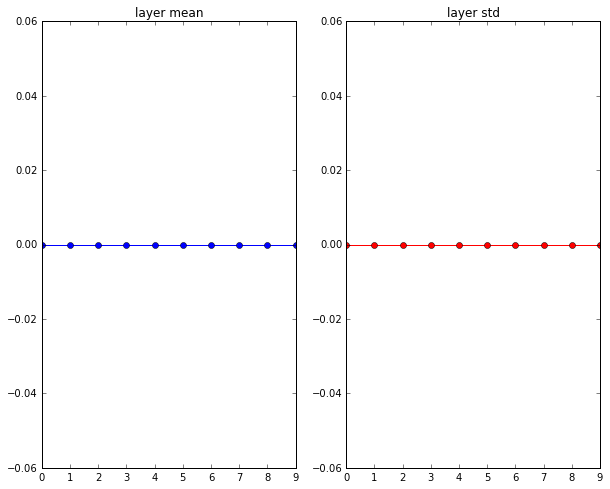

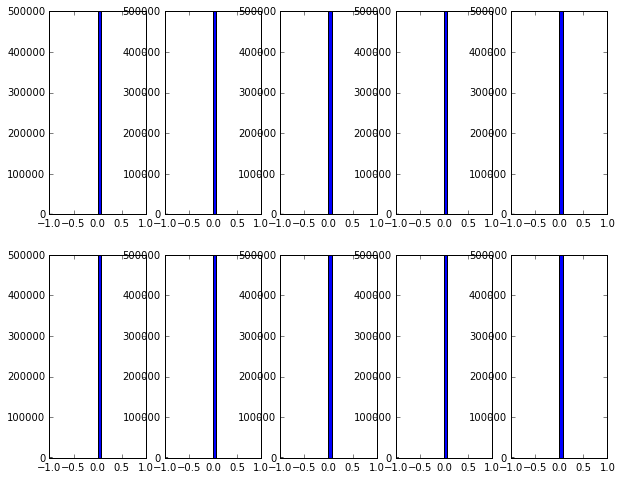

In [3]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 0)

input layer had mean 0.000945 and std 0.999894
hidden layer 1 had mean -0.000015 and std 0.213474
hidden layer 2 had mean 0.000050 and std 0.047564
hidden layer 3 had mean 0.000009 and std 0.010640
hidden layer 4 had mean -0.000002 and std 0.002381
hidden layer 5 had mean 0.000000 and std 0.000532
hidden layer 6 had mean -0.000000 and std 0.000119
hidden layer 7 had mean 0.000000 and std 0.000027
hidden layer 8 had mean 0.000000 and std 0.000006
hidden layer 9 had mean -0.000000 and std 0.000001
hidden layer 10 had mean -0.000000 and std 0.000000


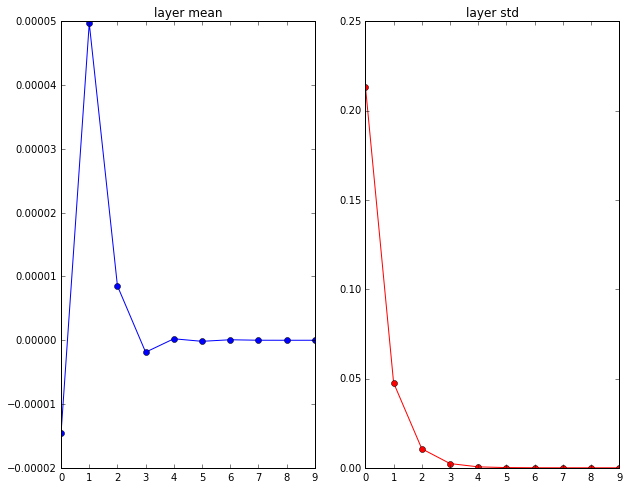

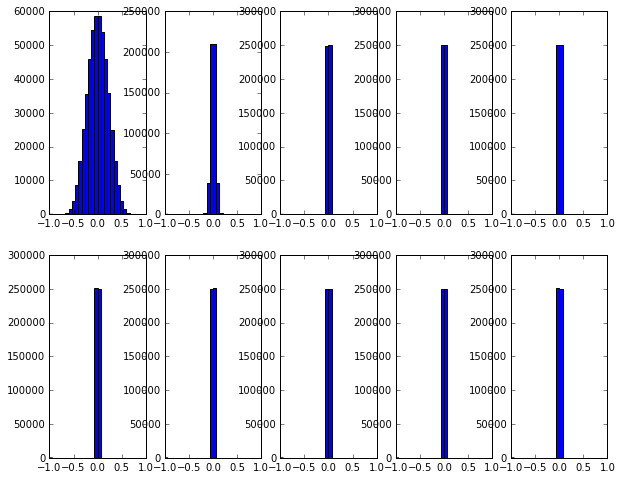

In [4]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 0.01)

input layer had mean 0.000365 and std 0.998497
hidden layer 1 had mean -0.002112 and std 0.982045
hidden layer 2 had mean -0.001977 and std 0.981893
hidden layer 3 had mean 0.000730 and std 0.981617
hidden layer 4 had mean -0.000741 and std 0.981609
hidden layer 5 had mean 0.001105 and std 0.981867
hidden layer 6 had mean -0.000464 and std 0.981768
hidden layer 7 had mean -0.000985 and std 0.981787
hidden layer 8 had mean -0.001355 and std 0.981706
hidden layer 9 had mean 0.001108 and std 0.981740
hidden layer 10 had mean -0.001188 and std 0.981817


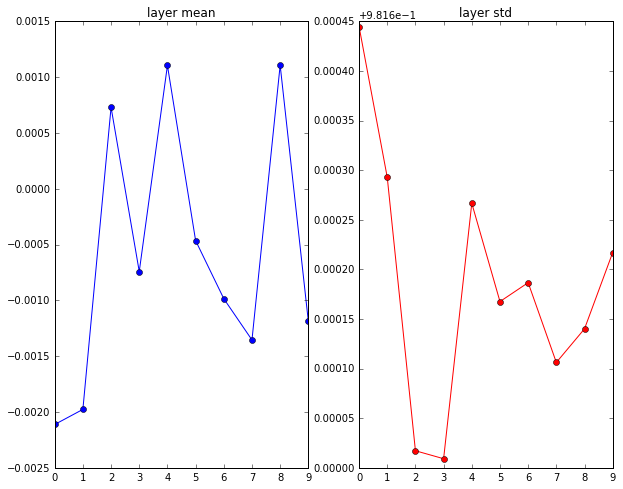

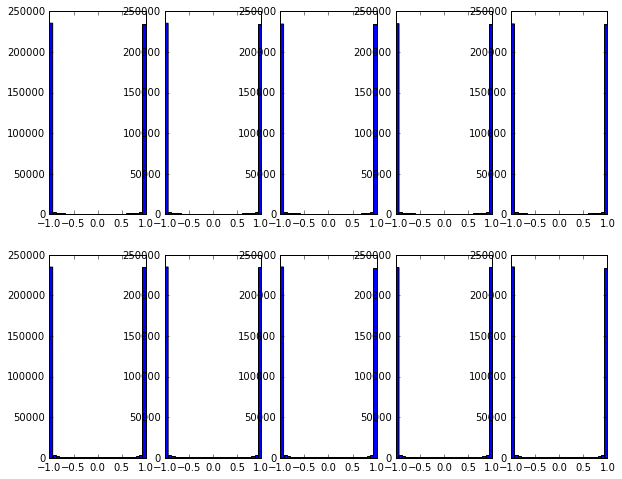

In [5]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 1)

input layer had mean -0.002151 and std 0.998846
hidden layer 1 had mean 0.000359 and std 0.998211
hidden layer 2 had mean 0.000225 and std 0.998172
hidden layer 3 had mean -0.003243 and std 0.998189
hidden layer 4 had mean -0.001020 and std 0.998195
hidden layer 5 had mean -0.001182 and std 0.998173
hidden layer 6 had mean -0.001159 and std 0.998243
hidden layer 7 had mean -0.000065 and std 0.998187
hidden layer 8 had mean 0.001017 and std 0.998283
hidden layer 9 had mean 0.002032 and std 0.998173
hidden layer 10 had mean 0.001463 and std 0.998201


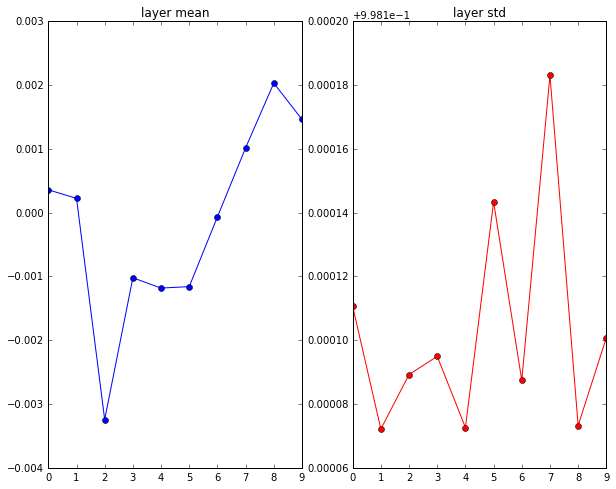

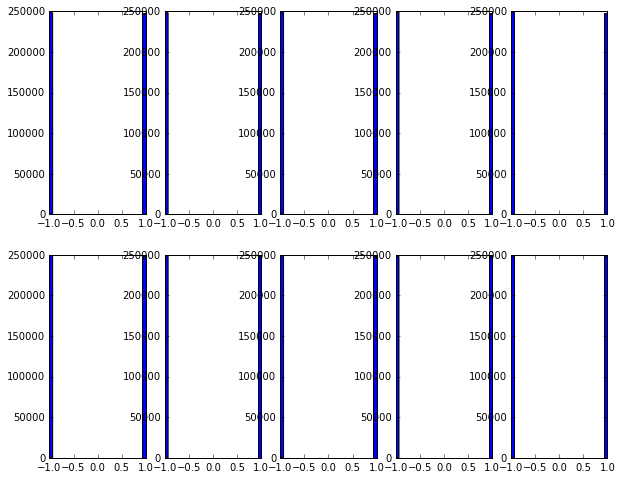

In [6]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 10)

input layer had mean -0.000194 and std 0.999929
hidden layer 1 had mean -0.000507 and std 0.627557
hidden layer 2 had mean 0.000652 and std 0.485627
hidden layer 3 had mean -0.001883 and std 0.407161
hidden layer 4 had mean -0.000005 and std 0.356367
hidden layer 5 had mean 0.000142 and std 0.319812
hidden layer 6 had mean 0.000436 and std 0.292243
hidden layer 7 had mean 0.000242 and std 0.270426
hidden layer 8 had mean 0.000058 and std 0.253056
hidden layer 9 had mean 0.000349 and std 0.238505
hidden layer 10 had mean -0.000014 and std 0.226489


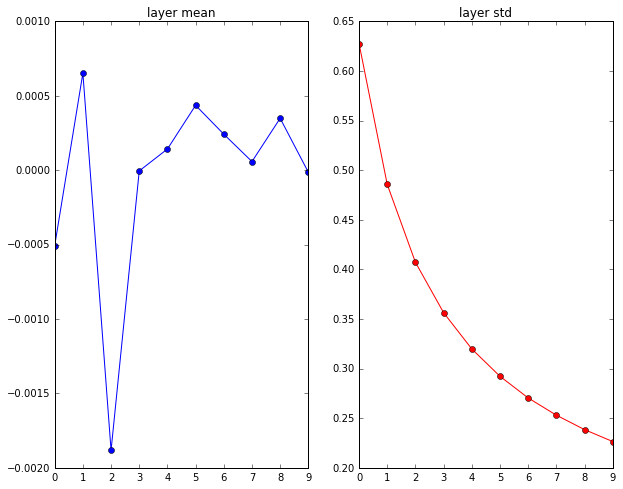

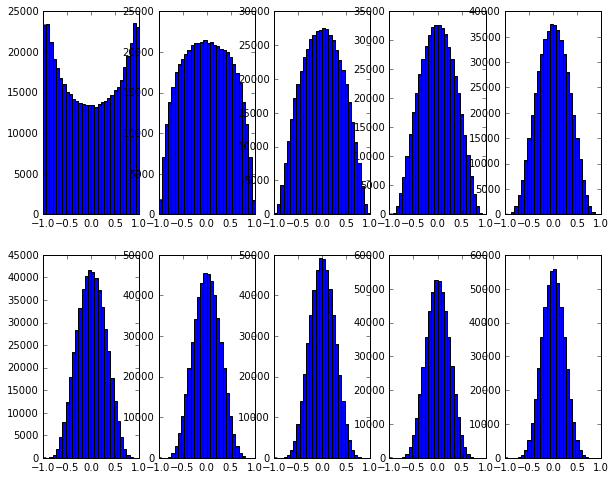

In [7]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) / np.sqrt(fan_in))

input layer had mean 0.000173 and std 1.000489
hidden layer 1 had mean 0.397559 and std 0.582579
hidden layer 2 had mean 0.281829 and std 0.411663
hidden layer 3 had mean 0.179383 and std 0.276397
hidden layer 4 had mean 0.136533 and std 0.202138
hidden layer 5 had mean 0.091959 and std 0.137260
hidden layer 6 had mean 0.071491 and std 0.100429
hidden layer 7 had mean 0.048515 and std 0.071898
hidden layer 8 had mean 0.033259 and std 0.047240
hidden layer 9 had mean 0.021611 and std 0.032770
hidden layer 10 had mean 0.015584 and std 0.023057


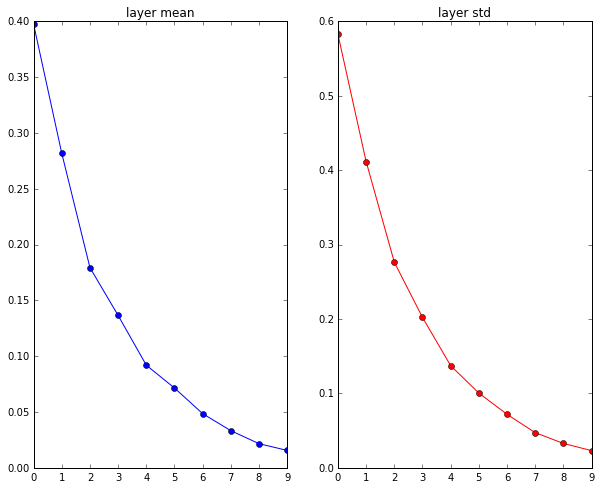

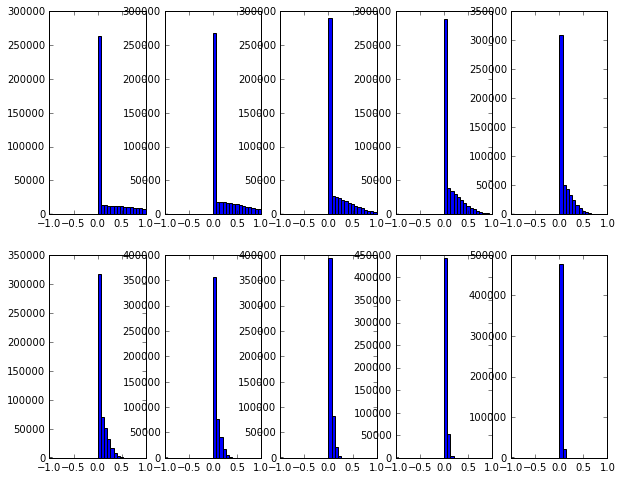

In [8]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) / np.sqrt(fan_in),
                     nonlinearity='relu')

input layer had mean 0.001661 and std 1.000507
hidden layer 1 had mean 0.566637 and std 0.828551
hidden layer 2 had mean 0.565270 and std 0.834805
hidden layer 3 had mean 0.534607 and std 0.815590
hidden layer 4 had mean 0.555243 and std 0.808219
hidden layer 5 had mean 0.578771 and std 0.862502
hidden layer 6 had mean 0.625299 and std 0.909875
hidden layer 7 had mean 0.674845 and std 0.948868
hidden layer 8 had mean 0.679349 and std 0.974526
hidden layer 9 had mean 0.664674 and std 0.992281
hidden layer 10 had mean 0.748591 and std 1.075359


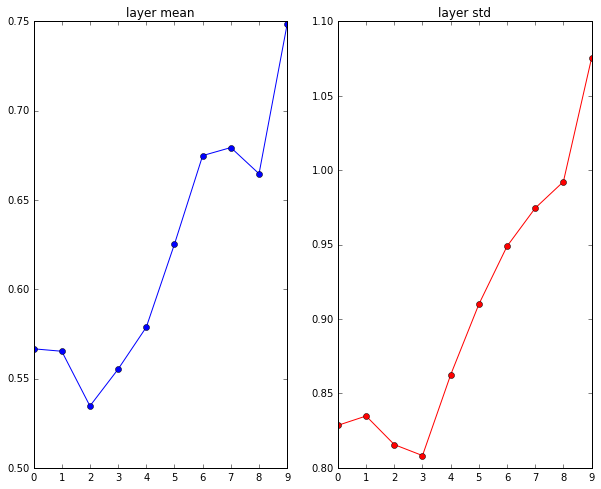

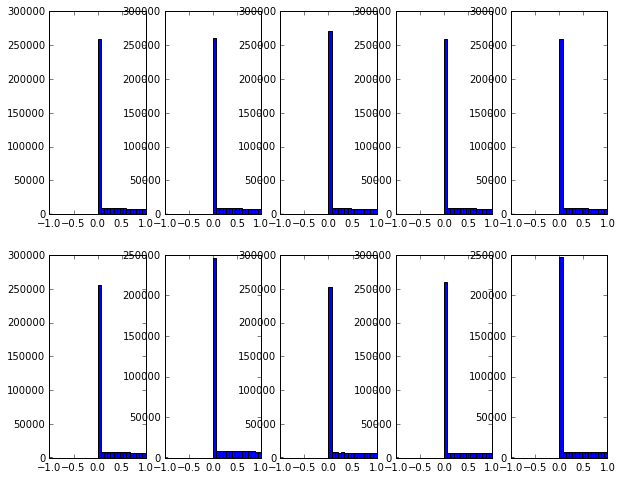

In [9]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2),
                     nonlinearity='relu')